**Criação do Schema para Organização do Projeto**

In [ ]:
USE DW_60
GO
--CREATE SCHEMA STAGING
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='STAGING')
   EXEC('CREATE SCHEMA STAGING');
    --CREATE SCHEMA STAGING
GO
--CREATE SCHEMA SILVER
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='SILVER')
 EXEC('CREATE SCHEMA SILVER');
GO
--CREATE SCHEMA GOLD
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='GOLD')
EXEC('CREATE SCHEMA GOLD');
GO
--CREATE SCHEMA LOGS
IF NOT EXISTS (SELECT 1 FROM sys.schemas WHERE name='LOGS')
    EXEC('CREATE SCHEMA LOGS');
GO


**Criação Tabela de Log**

In [29]:
USE [DW_60]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='LOG_CHALLENGE' AND xtype='U')

CREATE TABLE [DW_60].[LOGS].[LOG_CHALLENGE]
    (
        ID INT IDENTITY(1,1) NOT NULL PRIMARY KEY,
        NUMERO_ERRO INT,
        SERVERIDADE_ERRO INT,
        ESTADO_ERRO  INT,
        PROC_ERRO NVARCHAR(255),
        LINHA_ERRO INT,
        LINHAS_INSERT INT,
        LINHAS_UPDATE INT,
        LINHAS_DELETE INT,
        MSG_ERRO NVARCHAR(1000),
        SITUACAO NVARCHAR(10),
        PROCESSO NVARCHAR(30),
        DATA_INI DATETIME,
        DATA_FIM DATETIME  
    )

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.299

**CRIANDO UM PROCEDURE DE LOG PARA REUTILIZAÇÃO NOS PROCESSOS**

In [30]:
USE DW_60
GO
CREATE OR ALTER PROCEDURE [SP_INSERT_LOG_CHALLENGE]
    
    @LINHAS_INSERT INT,
    --@LINHAS_UPDATE INT,
    --@LINHAS_DELETE INT,
    @SITUACAO NVARCHAR(10),
    @PROCESSO NVARCHAR(30),
    @DATA_INI DATETIME,
    @DATA_FIM DATETIME  
AS
BEGIN
    SET NOCOUNT ON;

    INSERT INTO [DW_60].[LOGS].[LOG_CHALLENGE]
    (
        NUMERO_ERRO,
        SERVERIDADE_ERRO,
        ESTADO_ERRO,
        PROC_ERRO,
        LINHA_ERRO,
        LINHAS_INSERT,
      --  LINHAS_UPDATE,
      --  LINHAS_DELETE,
        MSG_ERRO,
        SITUACAO,
        PROCESSO,
        DATA_INI,
        DATA_FIM
    )
  SELECT   
        ERROR_NUMBER() AS ErrorNumber  ,
        ERROR_SEVERITY() AS ErrorSeverity  ,
        ERROR_STATE() AS ErrorState , 
        ERROR_LINE () AS ErrorLine , 
        ERROR_PROCEDURE() AS ErrorProcedure  ,
        @LINHAS_INSERT,
        --@LINHAS_UPDATE,
        --@LINHAS_DELETE,
        ERROR_MESSAGE() AS ErrorMessage,
        @SITUACAO,
        @PROCESSO,
        @DATA_INI,
        @DATA_FIM
    
END

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.299

**CRIANDO TABELA STAGING PARA RECEBER DADOS BRUTOS**

In [31]:
USE DW_60
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE NAME='STG_DESPESAS' AND xtype='U')

CREATE TABLE [DW_60].[STAGING].[STG_DESPESAS](
    [ANO_MES] nvarchar(10),
    [COD_ORG_SUPERIOR] nvarchar(150),
    [NOME_ORG_SUPERIOR] nvarchar(150),
    [COD_ORG_SUBORDINADO] nvarchar(150),
    [NOME_ORG_SUBORDINADO] nvarchar(150),

    [COD_UNID_GESTORA] nvarchar(150),
    [NOME_UNID_GESTORA] nvarchar(150),
    [COD_GESTAO] nvarchar(150),
    [NOME_GESTAO] nvarchar(150),
    [COD_UNID_ORCAMENTARIA] nvarchar(150),

    [NOME_UNID_ORCAMENTARIA] nvarchar(150),
    [COD_FUNCAO] nvarchar(150),
    [NOME_FUNCAO] nvarchar(150),
    [COD_SUBFUNCAO] nvarchar(150),
    [NOME_SUBFUNCAO] nvarchar(150),

    [COD_PROG_ORCAMENTARIO] nvarchar(150),
    [NOME_PROG_ORCAMENTARIO] nvarchar(150),
    [COD_ACAO] nvarchar(150),
    [NOME_ACAO] nvarchar(250),
    [COD_PLAN_ORCAMENTARIO] nvarchar(150),

    [NOME_PLAN_ORCAMENTARIO] nvarchar(250),
    [COD_PROG_GOVERNO] nvarchar(150),
    [NOME_PROG_GOVERNO] nvarchar(250),
    [UF] nvarchar(50),
    [MUNICIPIO] nvarchar(150),

    [COD_SUBTITULO] nvarchar(150),
    [NOME_SUBTITULO] nvarchar(150),
    [COD_LOCALIZADOR] nvarchar(150),
    [NOME_LOCALIZADOR] nvarchar(150),
    [SGL_LOCALIZADOR] nvarchar(150),

    [DESCR_COMP_LOCALIZADOR] nvarchar(150),
    [COD_AUTOR_EMENDA] nvarchar(150),
    [NOME_AUTOR_EMENDA] nvarchar(150),
    [COD_CAT_ECONOMICA] nvarchar(150),
    [NOME_CAT_ECONOMICA] nvarchar(150),

    [COD_GRP_DESPESA] nvarchar(150),
    [NOME_GRP_DESPESA] nvarchar(150),
    [COD_ELEMENTO_DESPESA] nvarchar(150),
    [NOME_ELEMENTO_DESPESA] nvarchar(150),
    [COD_MODALIDADE_DESPESA] nvarchar(150),

    [NOME_MODALIDADE_DESPESA] nvarchar(150),
    [VALOR_EMPENHADO] nvarchar(150),
    [VALOR_LIQUIDADO] nvarchar(150),
    [VALOR_PAGO] nvarchar(150),
    [VALOR_RESTOS_INSCRITOS] nvarchar(150),

    [VALOR_RESTOS_CANCELADOS] nvarchar(150),
    [VALOR_RESTOS_PAGOS] nvarchar(150)
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.299

**CARGA BULK OTIMIZADA**

**HABILITAR <span style="color: rgb(163, 21, 21); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">xp_cmdshell</span>**

In [32]:
sp_configure 'show advanced options', 1;
GO
RECONFIGURE;
GO
sp_configure 'xp_cmdshell', 1;
GO
RECONFIGURE;
GO


Configuration option 'show advanced options' changed from 1 to 1. Run the RECONFIGURE statement to install.

Commands completed successfully.

Configuration option 'xp_cmdshell' changed from 1 to 1. Run the RECONFIGURE statement to install.

Commands completed successfully.

Total execution time: 00:00:00.611

In [33]:
--1. Declare variáveis de diretório e arquivos
USE DW_60
DECLARE @FolderPath varchar(1000) = 'C:\DWE2023\desafio\fontes\'
DECLARE @ArquivoExtension varchar(5) = '*.csv'
DECLARE @ArquivoName varchar(100)
DECLARE @ArquivoPath varchar(1000)
DECLARE @BULK_INSERT_SQL NVARCHAR(MAX)
DECLARE @LINHAS_INSERT INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
    SET @CONTA_LINHAS=0
    SET @VDATA_INI= GETDATE();
    SET @VPROCESSO='CARGA STAGING'
--3 Limpeza da tabela Staging
    TRUNCATE TABLE [DW_60].[STAGING].[STG_DESPESAS]

--4. Use o loop para iterar sobre os arquivos no diretório especificado e inserir na tabela temporária
    DECLARE @ArquivoList table (Arquivo varchar(200));
    --2.1 INSERT ARQUIVOS NA TABELA VARIAVEL
    INSERT INTO @ArquivoList
    EXEC xp_cmdshell 'dir /b  C:\DWE2023\desafio\fontes\*.csv'
    
--4.1 DELETE LINHA ONDE ARQUIVO É NULL
    DELETE FROM @ArquivoList WHERE Arquivo IS NULL

--5 DECLARA CURSOR PARA ITERAR ARQUIVOS NO DIRETORIO
    DECLARE cursorArquivo CURSOR FOR SELECT Arquivo FROM @ArquivoList
--5.1 ABRE CURSOR PARA ITERAR ARQUIVOS NO DIRETORIO
    OPEN cursorArquivo
    FETCH NEXT FROM cursorArquivo INTO @ArquivoName
--5.2 ESTRUTURA DE REPETIÇAO
    WHILE @@FETCH_STATUS = 0
    BEGIN
--5.3 ATRIBUI VALOR DO CAMINHO DO ARQUIVO NA VARIAVEL
        SET @ArquivoPath = concat(concat('''',@FolderPath),concat(@ArquivoName,''''))
--5.4  ATRIBUI VALOR(COMANDO SQL) NA VARIAVEL
        SET @BULK_INSERT_SQL = 'BULK INSERT [DW_60].[STAGING].[STG_DESPESAS] FROM ' + @ArquivoPath + '' +
                            ' WITH (CODEPAGE=''65001'', DATAFILETYPE=''char'', FIELDTERMINATOR='';'', ROWTERMINATOR=''\n'', FIRE_TRIGGERS, FIRSTROW=2, MAXERRORS=2, FORMAT=''CSV'')'
                            
--5.5  EXECUTA A INSTRUÇÃO SQL RECURSIVAMENTE  
        EXEC sp_executesql @BULK_INSERT_SQL
--5.6  CONTA LINHAS INSERIDAS    
    SET @LINHAS_INSERT=@@ROWCOUNT
--5.7  PROXIMO ARQUIVO
        FETCH NEXT FROM cursorArquivo INTO @ArquivoName
--5.8 Acumula valor das linhas Inseridas        
    SET @CONTA_LINHAS=@CONTA_LINHAS+@LINHAS_INSERT    
    END
    --FECHA CURSOR
    CLOSE cursorArquivo
    --DESALOCA CURSOR
    DEALLOCATE cursorArquivo
--6 Atribuia Data hora final
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @CONTA_LINHAS,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION;
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @CONTA_LINHAS,  --INSERT
   'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
                                       
END CATCH;

(4 rows affected)

(1 row affected)

(37530 rows affected)

(50987 rows affected)

(57749 rows affected)

Total execution time: 00:00:09.635

**DIMENSÕES IDENTIFICADAS**

- **D\_Org\_Superior | Tabela dimensão do Órgão Superior ||** 
    
    - SK\_ORG\_SUPERIOR | código SK do Órgão Superior || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID do Órgão Superior || INT, NOT NULL 
    - NOME\_ORG\_SUPERIOR | Nome do Órgão Superior || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Org\_Subordinado | Tabela dimensão do Órgão Superior ||** 
    
    - SK\_ORG\_SUBORDINADO | código SK do Órgão Subordinado|| INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID do Órgão Subordinado|| INT, NOT NULL 
    - NOME\_ORG\_SUBORDINADO | Nome do Órgão Subordinado|| NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM  | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Unid\_Gestora | Tabela dimensão da Unidade Gestora ||** 
    
    - SK\_UNID\_GESTORA | código SK da Unidade Gestora || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID da Unidade Gestora || INT, NOT NULL 
    - NOME\_UNID\_GESTORA | Nome da Unidade Gestora || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Gestao | Tabela dimensão da Gestão ||** 
    
    - SK\_GESTAO | código SK da Gestão || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID da Gestão || INT, NOT NULL UNIQUE
    - NOME\_GESTAO | Nome da Gestão || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT
- **D\_Grp\_Despesa | Tabela dimensão do Grupo de Despesa ||** 
    
    - SK\_GRP\_DESPESA | código SK do Grupo de Despesa || INT, NOT NULL, AUTO INCREMENT
    - ID\_COD | Código de ID do Grupo de Despesa || INT, NOT NULL 
    - NOME\_GRP\_DESPESA | Nome do Grupo de Despesa || NVARCHAR (150), NOT NULL
    - DATA\_INI | Data de criação do item || DATATIME, NOT NULL
    - DATA\_FIM | Data de desativação do item || DATATIME
    - ATIVO | Booleano para o status de ativação do item || BIT

**FATO IDENTIFICADAS**

- **F\_Despesa | Tabela fato conforme o pedido para análise das despesas ||** 
    - SK\_TRANSACAO | código SK da transação || INT, NOT NULL, AUTO INCREMENT
    - SK\_DATA| Data  || INT, NOT NULL, 
    - SK\_ORG\_SUPERIOR | código SK do Órgão Superior || INT, NOT NULL, , 
    - SK\_ORG\_SUBORDINADO | código SK do Órgão Subordinado || INT, NOT NULL, , 
    - SK\_UNID\_GESTORA | código SK da Unidade Gestora || INT, NOT NULL, , 
    - SK\_GESTAO | código SK da Gestão || INT, NOT NULL, , 
    - SK\_GRP\_DESPESA | código SK do Grupo de Despesa || INT, NOT NULL, , 
    - VALOR\_EMPENHADO | Valor Empenhado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_LIQUIDADO | Valor Liquidado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_PAGO | Valor Pago || DECIMAL(15,2), NOT NULL

In [34]:
USE DW_60
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Org_Superior' AND xtype='U')
-- CRIAÇÃO DA TABELA DIMENSÃO DO ORGÃO SUPERIOR
CREATE TABLE [DW_60].[SILVER].[D_Org_Superior](
    [SK_ORG_SUPERIOR] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL,
    [NOME_ORG_SUPERIOR] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME NOT NULL,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED(
        [SK_ORG_SUPERIOR] ASC
    ) WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Org_Subordinado' AND xtype='U')
-- CRIAÇÃO DA TABELA DIMENSÃO DO ORGÃO SUBORDINADO
CREATE TABLE [DW_60].[SILVER].[D_Org_Subordinado](
    [SK_ORG_SUBORDINADO] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_ORG_SUBORDINADO] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_ORG_SUBORDINADO] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Unid_Gestora' AND xtype='U')

-- CRIAÇÃO DA TABELA DIMENSÃO DA UNIDADE GESTORA
CREATE TABLE [DW_60].[SILVER].[D_Unid_Gestora](
    [SK_UNID_GESTORA] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_UNID_GESTORA] NVARCHAR(250) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_UNID_GESTORA] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Gestao' AND xtype='U')

-- CRIAÇÃO DA TABELA DIMENSÃO DA GESTAO
CREATE TABLE [DW_60].[SILVER].[D_Gestao](
    [SK_GESTAO] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_GESTAO] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_GESTAO] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='D_Grp_Despesa' AND xtype='U')

-- CRIAÇÃO DA TABELA DIMENSÃO DO GRUPO DE DESPESA
CREATE TABLE [DW_60].[SILVER].[D_Grp_Despesa](
    [SK_GRP_DESPESA] INT IDENTITY(1,1) NOT NULL,
    [ID_COD] [INT] NOT NULL ,
    [NOME_GRP_DESPESA] NVARCHAR(150) NOT NULL,
    [DATA_INI] DATETIME,
    [DATA_FIM] DATETIME,
    [ATIVO] BIT
    PRIMARY KEY CLUSTERED( [SK_GRP_DESPESA] ASC)
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.900

**Carga Dimensao** D\_Org\_Superior

In [35]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO ORGÃO SUPERIOR'


-- INICIA MERGE
INSERT INTO [DW_60].[SILVER].[D_Org_Superior](ID_COD, NOME_ORG_SUPERIOR, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_ORG_SUPERIOR, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_60].[SILVER].[D_Org_Superior] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_ORG_SUPERIOR, NOME_ORG_SUPERIOR
        FROM [DW_60].[STAGING].[STG_DESPESAS] 
        WHERE COD_ORG_SUPERIOR IS NOT NULL 
            AND NOME_ORG_SUPERIOR IS NOT NULL
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_ORG_SUPERIOR]
        WHEN MATCHED 
            AND (DESTINO.NOME_ORG_SUPERIOR <> ORIGEM.NOME_ORG_SUPERIOR)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0 
            
        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_ORG_SUPERIOR, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_ORG_SUPERIOR, ORIGEM.NOME_ORG_SUPERIOR, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_ORG_SUPERIOR,
            ORIGEM.NOME_ORG_SUPERIOR,
            GETDATE(),
            NULL,
            1
)
as changes
(
    action,
    ID_COD,
    NOME_ORG_SUPERIOR,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- FIM MERGE

-- CONTA LINHAS INSERIDAS    
SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.489

**Carga Dimensao** D\_Org\_Subordinado

In [36]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSAO ORG SUBORDINADO'


-- INICIA MERGE
INSERT INTO [DW_60].[SILVER].[D_Org_Subordinado](ID_COD, NOME_ORG_SUBORDINADO, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_ORG_SUBORDINADO, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_60].[SILVER].[D_Org_Subordinado] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_ORG_SUBORDINADO, NOME_ORG_SUBORDINADO 
        FROM [DW_60].[STAGING].[STG_DESPESAS] 
        WHERE COD_ORG_SUBORDINADO IS NOT NULL 
            AND NOME_ORG_SUBORDINADO IS NOT NULL
    ) AS ORIGEM
        
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_ORG_SUBORDINADO]
        WHEN MATCHED 
            AND (DESTINO.NOME_ORG_SUBORDINADO <> ORIGEM.NOME_ORG_SUBORDINADO)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_ORG_SUBORDINADO, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_ORG_SUBORDINADO, ORIGEM.NOME_ORG_SUBORDINADO, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_ORG_SUBORDINADO,
            ORIGEM.NOME_ORG_SUBORDINADO,
            GETDATE(),
            NULL,
            1
            
)

as changes
(
    action,
    ID_COD,
    NOME_ORG_SUBORDINADO,
    DATA_INI,
    DATA_FIM,
    ATIVO
   
)
WHERE ACTION='UPDATE';


-- FIM MERGE

-- CONTA LINHAS INSERIDAS    
SET @LINHAS_INSERT=@@ROWCOUNT
SELECT @@ROWCOUNT    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
    COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

(1 row affected)

Total execution time: 00:00:00.499

(No column name)
1


**Carga Dimensao** UNIDADE GESTORIA

In [37]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO UNIDADE GESTORA'

-- INICIA MERGE
INSERT INTO [DW_60].[SILVER].[D_Unid_Gestora](ID_COD, NOME_UNID_GESTORA, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_UNID_GESTORA, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_60].[SILVER].[D_Unid_Gestora] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_UNID_GESTORA, NOME_UNID_GESTORA FROM [DW_60].[STAGING].[STG_DESPESAS]
        WHERE HASHBYTES('SHA2_256',CONCAT(COD_UNID_GESTORA, NOME_UNID_GESTORA)) NOT IN (SELECT 
        HASHBYTES('SHA2_256',CONCAT(ID_COD, NOME_UNID_GESTORA)) FROM [DW_60].[SILVER].[D_Unid_Gestora] )
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_UNID_GESTORA]
        WHEN MATCHED 
            AND (DESTINO.NOME_UNID_GESTORA <> ORIGEM.NOME_UNID_GESTORA)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(),DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_UNID_GESTORA, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_UNID_GESTORA, ORIGEM.NOME_UNID_GESTORA, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_UNID_GESTORA,
            ORIGEM.NOME_UNID_GESTORA,
            GETDATE(),
            NULL,
            1
)
as changes
(
    action,
    ID_COD,
    NOME_UNID_GESTORA,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- FIM MERGE

-- CONTA LINHAS INSERIDAS    
SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.806

**Carga Dimensao** GESTÃO

In [38]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO GESTÃO'

-- INICIA MERGE
INSERT INTO [DW_60].[SILVER].[D_Gestao](ID_COD, NOME_GESTAO, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_GESTAO, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_60].[SILVER].[D_Gestao] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_GESTAO, NOME_GESTAO
        FROM [DW_60].[STAGING].[STG_DESPESAS] 
        WHERE COD_GESTAO IS NOT NULL 
            AND NOME_GESTAO IS NOT NULL
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_GESTAO]
        WHEN MATCHED 
            AND (DESTINO.NOME_GESTAO <> ORIGEM.NOME_GESTAO)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_GESTAO, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_GESTAO, ORIGEM.NOME_GESTAO, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_GESTAO,
            ORIGEM.NOME_GESTAO,
            GETDATE(),
            NULL,
            1
)
as changes
(
    action,
    ID_COD,
    NOME_GESTAO,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- FIM DO MERGE

SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.460

**Carga Dimensao** D\_Grp\_Despesa

In [39]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO GRUPO DE DESPESA'

-- INICIA MERGE
INSERT INTO [DW_60].[SILVER].[D_Grp_Despesa](ID_COD, NOME_GRP_DESPESA, DATA_INI, DATA_FIM, ATIVO)
SELECT ID_COD, NOME_GRP_DESPESA, DATA_INI, DATA_FIM, ATIVO
FROM (
    MERGE [DW_60].[SILVER].[D_Grp_Despesa] AS DESTINO 
    
    USING (
        SELECT DISTINCT COD_GRP_DESPESA, NOME_GRP_DESPESA
        FROM [DW_60].[STAGING].[STG_DESPESAS] 
        WHERE COD_GRP_DESPESA IS NOT NULL 
            AND NOME_GRP_DESPESA IS NOT NULL
    ) AS ORIGEM
    
    ON DESTINO.[ID_COD] = ORIGEM.[COD_GRP_DESPESA]
        WHEN MATCHED 
            AND (DESTINO.NOME_GRP_DESPESA <> ORIGEM.NOME_GRP_DESPESA)
            AND DESTINO.ATIVO=1
        THEN
            UPDATE SET DESTINO.DATA_FIM = GETDATE(), DESTINO.ATIVO=0

        WHEN NOT MATCHED
        THEN
            INSERT (ID_COD, NOME_GRP_DESPESA, DATA_INI, DATA_FIM, ATIVO) VALUES (ORIGEM.COD_GRP_DESPESA, ORIGEM.NOME_GRP_DESPESA, GETDATE(), NULL, 1)
        OUTPUT $action,
            ORIGEM.COD_GRP_DESPESA,
            ORIGEM.NOME_GRP_DESPESA,
            GETDATE(),
            NULL,
            1
)

as changes
(
    action,
    ID_COD,
    NOME_GRP_DESPESA,
    DATA_INI,
    DATA_FIM,
    ATIVO
)
WHERE ACTION='UPDATE';
-- TERMINA MERGE

SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:00.455

**CRIAÇÃO DIMENSÃO TEMPO**

In [40]:
USE DW_60
GO
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='DIM_TEMPO' AND xtype='U')
CREATE TABLE SILVER.DIM_TEMPO( 
 /* OBS 1: Nas dimensoes havera somente uma chave primaria simples com autoincremento e inteiro */
 SK_DATA int PRIMARY KEY,
 DATA date NOT NULL,
 ANO smallint NOT NULL,
 MES smallint NOT NULL,
 DIA smallint NOT NULL,
 MES_TEXTO VARCHAR(20),
 DIA_TEXTO VARCHAR(20),
 TRIMESTRE INT,
 ANO_MES VARCHAR(7),
)



Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.309

**CARGA DIMEMSÃO TEMPO**

In [ ]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA DIMENSÃO TEMPO'

 
 DECLARE 
    @SK_DATA INT,
    @V_DATA_INI date, 
    @V_DATA_FIM date, 
    @V_DATA date, 
    @V_ANO smallint, 
    @V_MES smallint, 
    @V_DIA smallint, 
    @V_MES_TEXTO VARCHAR(20),
    @V_DIA_TEXTO VARCHAR(20),
    @V_TRIMESTRE smallint,
    @V_ANO_MES VARCHAR(7)
    

--Descobrindo a menor e maior ano para criar Range de Data
SELECT @V_DATA_INI =CAST(SUBSTRING(MIN(ANO_MES),1,4)+'0101' AS DATE) , 
       @V_DATA_FIM =CAST(SUBSTRING(MAX(ANO_MES),1,4)+'1231' AS DATE)  
FROM [STAGING].[STG_DESPESAS]

--LIMPA TABELA
TRUNCATE TABLE SILVER.DIM_TEMPO 
--set @dataInicial = '01/01/2012'
--set @dataFinal = '31/12/2012'

while @V_DATA_INI <= @V_DATA_FIM
begin
 set @SK_DATA = format(@V_DATA_INI,'yyyyMMdd')
 set @V_DATA = @V_DATA_INI
 set @V_ANO = year(@V_DATA)
 set @V_MES = month(@V_DATA)
 set @V_DIA = day(@V_DATA)
 SET @V_MES_TEXTO =FORMAT( @V_DATA, 'MMMM', 'pt-BR' )
 set @V_DIA_TEXTO = FORMAT( @V_DATA, 'dddd', 'pt-BR' )
 set @V_TRIMESTRE = DATEPART(q,@V_DATA)
 set @V_ANO_MES = FORMAT(@V_DATA, 'yyyy/MM', 'pt-BR' )
 --set @V_MES_TEXTO = DATENAME(MONTH,@V_DATA)
 --set @V_DIA_TEXTO = DATENAME(WEEKDAY,@V_DATA)
 

INSERT INTO SILVER.DIM_TEMPO (SK_DATA,DATA,ANO,MES,DIA,MES_TEXTO,DIA_TEXTO,TRIMESTRE,ANO_MES)
 SELECT @SK_DATA,
    @V_DATA ,
    @V_ANO,
    @V_MES,
    @V_DIA,
    @V_MES_TEXTO,
    @V_DIA_TEXTO,
    @V_TRIMESTRE,
    @V_ANO_MES



 SET @V_DATA_INI = dateadd(day,1,@V_DATA_INI) 
end
--fim while
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()
EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

**Criação tabela Fato**

- F\_Despesa | Tabela fato conforme o pedido para análise das despesas
    - SK\_TRANSACAO| código SK da transação || INT, NOT NULL, AUTO INCREMENT
    - SK\_DATA | COD SK DATA || INT  NOT NULL, 
    - SK\_ORG\_SUPERIOR | código SK do Órgão Superior || INT, NOT NULL, UNIQUE, 
    - SK\_ORG\_SUBORDINADO | código SK do Órgão Subordinado || INT, NOT NULL, UNIQUE, 
    - SK\_UNID\_GESTORA | código SK da Unidade Gestora || INT, NOT NULL, UNIQUE, 
    - SK\_GESTAO | código SK da Gestão || INT, NOT NULL, UNIQUE, 
    - SK\_GRP\_DESPESA | código SK do Grupo de Despesa || INT, NOT NULL, UNIQUE, 
    - VALOR\_EMPENHADO | Valor Empenhado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_LIQUIDADO | Valor Liquidado || DECIMAL(15,2), NOT NULL, 
    - VALOR\_PAGO | Valor Pago || DECIMAL(15,2), NOT NULL)

In [42]:
USE DW_60
GO

IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='F_Despesa' AND xtype='U')

CREATE TABLE [DW_60].[GOLD].[F_Despesa]
(
    [SK_TRANSACAO] INT IDENTITY(1,1) NOT NULL,
    [SK_DATA] INT NOT NULL,
    [SK_ORG_SUPERIOR] INT NOT NULL,
    [SK_ORG_SUBORDINADO] INT NOT NULL,
    [SK_UNID_GESTORA] INT NOT NULL,
    [SK_GESTAO] INT NOT NULL,
    [SK_GRP_DESPESA] INT NOT NULL,
    [VALOR_EMPENHADO] DECIMAL(15,2) NOT NULL,
    [VALOR_LIQUIDADO] DECIMAL(15,2) NOT NULL,
    [VALOR_PAGO] DECIMAL(15,2) NOT NULL
    

    PRIMARY KEY CLUSTERED([SK_TRANSACAO] ASC) 
        WITH (PAD_INDEX = OFF, STATISTICS_NORECOMPUTE = OFF, IGNORE_DUP_KEY = OFF, ALLOW_ROW_LOCKS = ON, ALLOW_PAGE_LOCKS = ON, OPTIMIZE_FOR_SEQUENTIAL_KEY = OFF) ON [PRIMARY]
) ON [PRIMARY]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.300

**CONSULTA BASE PARA CARGA FATO**

In [43]:
USE DW_60
GO

SELECT TOP 50
        CAST(REPLACE(STG_ORIGEM.ANO_MES,'/','')+'01' AS INT) SK_DATA,
        ORG_SUPERIOR.SK_ORG_SUPERIOR,
        ORG_SUBORDINADO.SK_ORG_SUBORDINADO,
        UNID_GESTORA.SK_UNID_GESTORA,
        GESTAO.SK_GESTAO,
        GRP_DESPESA.SK_GRP_DESPESA,
        CAST(REPLACE(STG_ORIGEM.VALOR_EMPENHADO,',','.') AS DECIMAL(15,2)) AS VALOR_EMPENHADO,
        CAST(REPLACE(STG_ORIGEM.VALOR_LIQUIDADO,',','.')  AS DECIMAL(15,2))VALOR_LIQUIDADO ,
        CAST(REPLACE(STG_ORIGEM.VALOR_PAGO,',','.')  AS DECIMAL(15,2)) VALOR_PAGO,
        STG_ORIGEM.VALOR_EMPENHADO,
        STG_ORIGEM.VALOR_LIQUIDADO,
        STG_ORIGEM.VALOR_PAGO

    FROM [DW_60].[STAGING].[STG_DESPESAS] STG_ORIGEM
    INNER JOIN [DW_60].[SILVER].[D_Org_Superior] ORG_SUPERIOR
    ON STG_ORIGEM.COD_ORG_SUPERIOR = ORG_SUPERIOR.ID_COD
    AND ORG_SUPERIOR.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Org_Subordinado] ORG_SUBORDINADO
    ON STG_ORIGEM.COD_ORG_SUBORDINADO = ORG_SUBORDINADO.ID_COD
    AND ORG_SUBORDINADO.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Unid_Gestora] UNID_GESTORA
    ON STG_ORIGEM.COD_UNID_GESTORA = UNID_GESTORA.ID_COD
    AND UNID_GESTORA.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Gestao] GESTAO
    ON STG_ORIGEM.COD_GESTAO = GESTAO.ID_COD
    AND GESTAO.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Grp_Despesa] GRP_DESPESA
    ON STG_ORIGEM.COD_GRP_DESPESA = GRP_DESPESA.ID_COD
    AND GRP_DESPESA.ATIVO=1 
    

GO

Commands completed successfully.

(50 rows affected)

Total execution time: 00:00:00.323

SK_DATA,SK_ORG_SUPERIOR,SK_ORG_SUBORDINADO,SK_UNID_GESTORA,SK_GESTAO,SK_GRP_DESPESA,VALOR_EMPENHADO,VALOR_LIQUIDADO,VALOR_PAGO,VALOR_EMPENHADO,VALOR_LIQUIDADO,VALOR_PAGO
20220101,6,203,1903,81,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,17,211,2935,116,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,17,42,1148,9,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,6,54,439,81,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,2,151,1702,49,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,6,153,3227,81,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,16,179,3346,28,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,17,99,2647,78,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,15,66,3313,128,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"
20220101,6,77,1904,81,1,0.00,0.00,0.00,"0,0000","0,0000","0,0000"


**CARGA FATO**

In [44]:
USE DW_60
GO
DECLARE @LINHAS_INSERT INT
DECLARE @LINHAS_UPDATE INT
DECLARE @CONTA_LINHAS INT
DECLARE @VDATA_INI DATETIME
DECLARE @VDATA_FIM DATETIME
DECLARE @VPROCESSO VARCHAR(50)
    
BEGIN TRANSACTION
    BEGIN TRY
--2 Atribuido valor as variáveis
SET @CONTA_LINHAS=0
SET @LINHAS_INSERT=0
SET @VDATA_INI= GETDATE();
SET @VPROCESSO='CARGA FATO'

-- INICIA MERGE
MERGE [DW_60].[GOLD].[F_Despesa] AS DESTINO

USING (
    SELECT
        CAST(REPLACE(STG_ORIGEM.ANO_MES,'/','')+'01' AS INT) SK_DATA, -- CRIANDO SK DATA
        ORG_SUPERIOR.SK_ORG_SUPERIOR,
        ORG_SUBORDINADO.SK_ORG_SUBORDINADO,
        UNID_GESTORA.SK_UNID_GESTORA,
        GESTAO.SK_GESTAO,
        GRP_DESPESA.SK_GRP_DESPESA,
        CAST(REPLACE(STG_ORIGEM.VALOR_EMPENHADO,',','.') AS DECIMAL(15,2)) AS VALOR_EMPENHADO, --TRATANDO VALOR_EMPENHADO 
        CAST(REPLACE(STG_ORIGEM.VALOR_LIQUIDADO,',','.')  AS DECIMAL(15,2))VALOR_LIQUIDADO , --TRATANDO VALOR_LIQUIDADO
        CAST(REPLACE(STG_ORIGEM.VALOR_PAGO,',','.')  AS DECIMAL(15,2)) VALOR_PAGO -- TRATANDO VALOR_PAGO
       
    FROM [DW_60].[STAGING].[STG_DESPESAS] STG_ORIGEM
    INNER JOIN [DW_60].[SILVER].[D_Org_Superior] ORG_SUPERIOR
    ON STG_ORIGEM.COD_ORG_SUPERIOR = ORG_SUPERIOR.ID_COD
    AND ORG_SUPERIOR.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Org_Subordinado] ORG_SUBORDINADO
    ON STG_ORIGEM.COD_ORG_SUBORDINADO = ORG_SUBORDINADO.ID_COD
    AND ORG_SUBORDINADO.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Unid_Gestora] UNID_GESTORA
    ON STG_ORIGEM.COD_UNID_GESTORA = UNID_GESTORA.ID_COD
    AND UNID_GESTORA.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Gestao] GESTAO
    ON STG_ORIGEM.COD_GESTAO = GESTAO.ID_COD
    AND GESTAO.ATIVO=1

    INNER JOIN [DW_60].[SILVER].[D_Grp_Despesa] GRP_DESPESA
    ON STG_ORIGEM.COD_GRP_DESPESA = GRP_DESPESA.ID_COD
    AND GRP_DESPESA.ATIVO=1 
    
    ) AS ORIGEM

    --ON (DESTINO.SK_GESTAO = ORIGEM.SK_GESTAO AND DESTINO.SK_GRP_DESPESA = ORIGEM.SK_GRP_DESPESA)
    ON
    HASHBYTES('SHA2_256',CONCAT(DESTINO.SK_DATA,DESTINO.SK_ORG_SUPERIOR,DESTINO.SK_ORG_SUBORDINADO,DESTINO.SK_UNID_GESTORA,DESTINO.SK_GESTAO,DESTINO.SK_GRP_DESPESA,DESTINO.VALOR_EMPENHADO,DESTINO.VALOR_LIQUIDADO,DESTINO.VALOR_PAGO))=
    HASHBYTES('SHA2_256',CONCAT(ORIGEM.SK_DATA,ORIGEM.SK_ORG_SUPERIOR,ORIGEM.SK_ORG_SUBORDINADO,ORIGEM.SK_UNID_GESTORA,ORIGEM.SK_GESTAO,ORIGEM.SK_GRP_DESPESA,ORIGEM.VALOR_EMPENHADO,ORIGEM.VALOR_LIQUIDADO,ORIGEM.VALOR_PAGO))
  
    WHEN NOT MATCHED
    -- QUANDO NÃO HÁ, INSERIR O DADO
    THEN INSERT (SK_DATA, SK_ORG_SUPERIOR, SK_ORG_SUBORDINADO, SK_UNID_GESTORA, SK_GESTAO, SK_GRP_DESPESA, VALOR_EMPENHADO, VALOR_LIQUIDADO, VALOR_PAGO)
        VALUES(
            ORIGEM.SK_DATA,
            ORIGEM.SK_ORG_SUPERIOR,
            ORIGEM.SK_ORG_SUBORDINADO,
            ORIGEM.SK_UNID_GESTORA,
            ORIGEM.SK_GESTAO,
            ORIGEM.SK_GRP_DESPESA,
            ORIGEM.VALOR_EMPENHADO,
            ORIGEM.VALOR_LIQUIDADO,
            ORIGEM.VALOR_PAGO
        );
--FIM MERGE

--GRAVA LOG
SET @LINHAS_INSERT=@@ROWCOUNT
    
SET @VDATA_FIM=GETDATE()
--7 Executa a procedure de Log
EXECUTE SP_INSERT_LOG_CHALLENGE     
    @LINHAS_INSERT,  --INSERT
    'SUCESSO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM
--8  Executa o Committ
IF @@TRANCOUNT > 0
        COMMIT TRANSACTION;

--Fim try
END TRY
--
BEGIN CATCH
-- GRAVA LOG DE ERRO
    IF @@TRANCOUNT > 0
        ROLLBACK TRANSACTION
SET @VDATA_FIM=GETDATE()

EXECUTE SP_INSERT_LOG_CHALLENGE 
    @LINHAS_INSERT,  --INSERT
    'ERRO',
    @VPROCESSO,
    @VDATA_INI,
    @VDATA_FIM

END CATCH

Commands completed successfully.

(0 rows affected)

Total execution time: 00:00:03.549

**Star Schema**

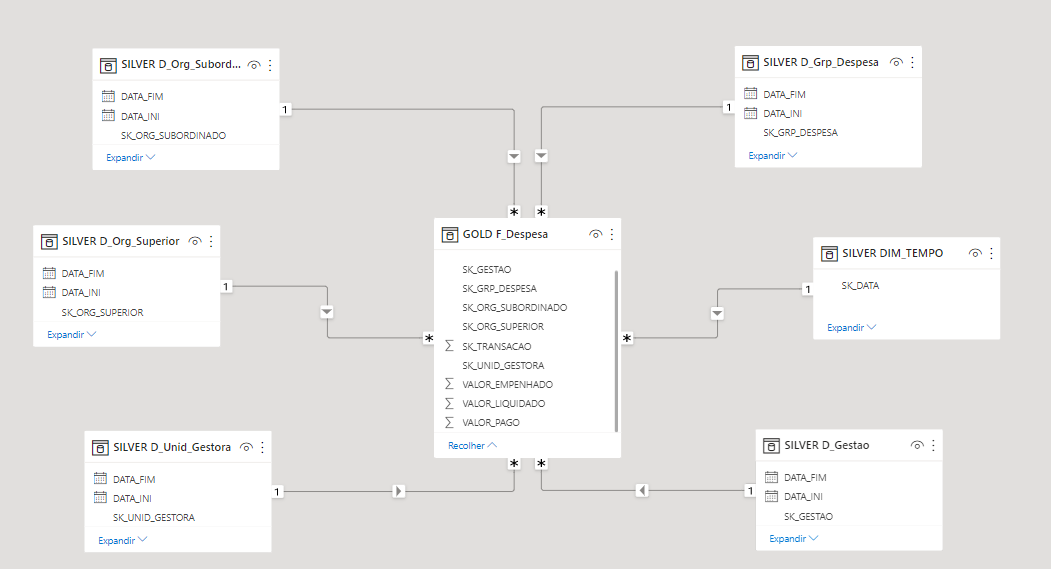

**<mark>\--- PARTE 2 - Conhecimentos de SQL e T-SQL(DML) ---</mark>**

**1- Qual o total em Jan/2022 Valor Pago (R$) para cada Órgão Superior?**

In [45]:
USE DW_60
GO

SELECT 
    TEMPO.ANO_MES AS ANO_MES, 
    SUPERIOR.ID_COD AS COD_ORG_SUPERIOR, 
    SUPERIOR.NOME_ORG_SUPERIOR, 
    FORMAT(SUM([FATO].VALOR_PAGO), 'C', 'pt-br') AS VALOR_PAGO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Org_Superior] SUPERIOR 
    ON FATO.SK_ORG_SUPERIOR = SUPERIOR.SK_ORG_SUPERIOR
    INNER JOIN [DW_60].SILVER.DIM_TEMPO TEMPO 
    ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.MES = 1

    GROUP BY TEMPO.ANO_MES , SUPERIOR.ID_COD, SUPERIOR.NOME_ORG_SUPERIOR
    ORDER BY SUM([FATO].VALOR_PAGO) desc
GO

Commands completed successfully.

(21 rows affected)

Total execution time: 00:00:00.333

ANO_MES,COD_ORG_SUPERIOR,NOME_ORG_SUPERIOR,VALOR_PAGO
2022/01,25000,Ministério da Economia,"R$ 234.802.420.718,84"
2022/01,40000,Ministério do Trabalho,"R$ 21.858.788.911,31"
2022/01,55000,Ministério da Cidadania,"R$ 7.172.552.844,52"
2022/01,36000,Ministério da Saúde,"R$ 5.921.404.686,18"
2022/01,26000,Ministério da Educação,"R$ 3.637.301.580,83"
2022/01,53000,Ministério do Desenvolvimento Regional,"R$ 2.194.723.594,72"
2022/01,52000,Ministério da Defesa,"R$ 1.459.213.388,54"
2022/01,30000,Ministério da Justiça e Segurança Pública,"R$ 469.330.451,84"
2022/01,35000,Ministério das Relações Exteriores,"R$ 219.205.873,95"
2022/01,32000,Ministério de Minas e Energia,"R$ 184.691.860,89"


**2- Quais os top 10 Órgãos Superiores referente a Jan/2022 em Valor Pago (R$)**

In [46]:
USE DW_60
GO

SELECT TOP 10
    TEMPO.ANO_MES AS ANO_MES, 
    SUPERIOR.ID_COD AS COD_ORG_SUPERIOR, 
    SUPERIOR.NOME_ORG_SUPERIOR, 
    FORMAT(SUM([FATO].VALOR_PAGO), 'C', 'pt-br') AS VALOR_PAGO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Org_Superior] SUPERIOR 
    ON FATO.SK_ORG_SUPERIOR = SUPERIOR.SK_ORG_SUPERIOR
    INNER JOIN [DW_60].SILVER.DIM_TEMPO TEMPO 
    ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.MES = 1

    GROUP BY TEMPO.ANO_MES , SUPERIOR.ID_COD, SUPERIOR.NOME_ORG_SUPERIOR
    ORDER BY SUM([FATO].VALOR_PAGO) desc
GO

Commands completed successfully.

(10 rows affected)

Total execution time: 00:00:00.324

ANO_MES,COD_ORG_SUPERIOR,NOME_ORG_SUPERIOR,VALOR_PAGO
2022/01,25000,Ministério da Economia,"R$ 234.802.420.718,84"
2022/01,40000,Ministério do Trabalho,"R$ 21.858.788.911,31"
2022/01,55000,Ministério da Cidadania,"R$ 7.172.552.844,52"
2022/01,36000,Ministério da Saúde,"R$ 5.921.404.686,18"
2022/01,26000,Ministério da Educação,"R$ 3.637.301.580,83"
2022/01,53000,Ministério do Desenvolvimento Regional,"R$ 2.194.723.594,72"
2022/01,52000,Ministério da Defesa,"R$ 1.459.213.388,54"
2022/01,30000,Ministério da Justiça e Segurança Pública,"R$ 469.330.451,84"
2022/01,35000,Ministério das Relações Exteriores,"R$ 219.205.873,95"
2022/01,32000,Ministério de Minas e Energia,"R$ 184.691.860,89"


**3- Qual o total no Trimestre do Valor Empenhado (R$) para cada Gestão?**

In [47]:
USE DW_60
GO

SELECT 
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    FORMAT(SUM([FATO].VALOR_EMPENHADO), 'C', 'pt-br') AS VALOR_EMPENHADO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Gestao] GESTAO 
        ON FATO.SK_GESTAO = GESTAO.SK_GESTAO
     INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.TRIMESTRE = 1    
    GROUP BY GESTAO.ID_COD, GESTAO.NOME_GESTAO
    ORDER BY SUM([FATO].VALOR_EMPENHADO) DESC
GO

Commands completed successfully.

(187 rows affected)

Total execution time: 00:00:00.344

COD_GESTAO,NOME_GESTAO,VALOR_EMPENHADO
1,TESOURO NACIONAL,"R$ 1.399.731.441.129,46"
57904,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,"R$ 326.083.772.989,95"
57202,INSTITUTO NACIONAL DO SEGURO SOCIAL,"R$ 77.917.754.280,06"
15253,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,"R$ 56.432.411.665,29"
32396,AGENCIA NACIONAL DE MINERACAO,"R$ 7.839.704.466,04"
32205,AGENCIA NACIONAL DO PETROLEO,"R$ 7.400.252.786,59"
26443,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"R$ 5.964.701.253,31"
32210,AGENCIA NACIONAL DE ENERGIA ELETRICA,"R$ 4.289.109.262,96"
25201,FUNDACAO OSWALDO CRUZ,"R$ 3.249.557.022,91"
13203,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,"R$ 3.127.154.618,52"


**4- Quais as Top 10 Gestão no Trimestre referente a valor empenhado?**

In [48]:
USE DW_60
GO

SELECT TOP 10
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    FORMAT(SUM([FATO].VALOR_EMPENHADO), 'C', 'pt-br') AS VALOR_EMPENHADO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Gestao] GESTAO 
        ON FATO.SK_GESTAO = GESTAO.SK_GESTAO
     INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA
    WHERE TEMPO.TRIMESTRE = 1    
    GROUP BY GESTAO.ID_COD, GESTAO.NOME_GESTAO
    ORDER BY SUM([FATO].VALOR_EMPENHADO) DESC
GO

Commands completed successfully.

(10 rows affected)

Total execution time: 00:00:00.333

COD_GESTAO,NOME_GESTAO,VALOR_EMPENHADO
1,TESOURO NACIONAL,"R$ 1.399.731.441.129,46"
57904,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,"R$ 326.083.772.989,95"
57202,INSTITUTO NACIONAL DO SEGURO SOCIAL,"R$ 77.917.754.280,06"
15253,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,"R$ 56.432.411.665,29"
32396,AGENCIA NACIONAL DE MINERACAO,"R$ 7.839.704.466,04"
32205,AGENCIA NACIONAL DO PETROLEO,"R$ 7.400.252.786,59"
26443,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"R$ 5.964.701.253,31"
32210,AGENCIA NACIONAL DE ENERGIA ELETRICA,"R$ 4.289.109.262,96"
25201,FUNDACAO OSWALDO CRUZ,"R$ 3.249.557.022,91"
13203,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,"R$ 3.127.154.618,52"


**5- Qual o total mês a mês de Valor Liquidado (R$) para cada Grupo de Despesa?**

In [49]:
USE DW_60
GO

SELECT 
    TEMPO.ANO_MES AS MES, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(SUM([FATO].VALOR_LIQUIDADO), 'C', 'pt-br') AS VALOR_LIQUIDADO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Grp_Despesa] DESPESA 
        ON FATO.SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
     INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    

    GROUP BY TEMPO.ANO_MES, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY DESPESA.ID_COD ASC, TEMPO.ANO_MES ASC
GO

Commands completed successfully.

(18 rows affected)

Total execution time: 00:00:00.329

MES,COD_GRP_DESPESA,NOME_GRP_DESPESA,VALOR_LIQUIDADO
2022/01,1,Pessoal e Encargos Sociais,"R$ 22.561.908.507,61"
2022/02,1,Pessoal e Encargos Sociais,"R$ 22.972.584.596,56"
2022/03,1,Pessoal e Encargos Sociais,"R$ 22.990.757.157,15"
2022/01,2,Juros e Encargos da Dívida,"R$ 52.288.306.158,19"
2022/02,2,Juros e Encargos da Dívida,"R$ 38.460.931.941,51"
2022/03,2,Juros e Encargos da Dívida,"R$ 2.065.735.373,50"
2022/01,3,Outras Despesas Correntes,"R$ 100.030.174.839,40"
2022/02,3,Outras Despesas Correntes,"R$ 144.253.119.185,21"
2022/03,3,Outras Despesas Correntes,"R$ 137.416.147.226,83"
2022/01,4,Investimentos,"R$ 9.090.426,88"


**6- Quais os TOP 10 Grupo de Despesas referente a valor Liquidado (R$) em Fev/2022?**

In [50]:
USE DW_60
GO

SELECT TOP 10
    TEMPO.ANO_MES AS MES, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(SUM([FATO].VALOR_LIQUIDADO), 'C', 'pt-br') AS VALOR_LIQUIDADO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Grp_Despesa] DESPESA 
        ON FATO.SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
     INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
  WHERE TEMPO.ANO=2022
    AND TEMPO.MES=2
    GROUP BY TEMPO.ANO_MES, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY  SUM([FATO].VALOR_LIQUIDADO) DESC
GO

Commands completed successfully.

(6 rows affected)

Total execution time: 00:00:00.337

MES,COD_GRP_DESPESA,NOME_GRP_DESPESA,VALOR_LIQUIDADO
2022/02,3,Outras Despesas Correntes,"R$ 144.253.119.185,21"
2022/02,2,Juros e Encargos da Dívida,"R$ 38.460.931.941,51"
2022/02,1,Pessoal e Encargos Sociais,"R$ 22.972.584.596,56"
2022/02,6,Amortização/Refinanciamento da Dívida,"R$ 3.396.754.006,30"
2022/02,5,Inversões Financeiras,"R$ 3.089.737.983,43"
2022/02,4,Investimentos,"R$ 223.407.660,92"


**7- Qual a variação %(MoM) de Valor Empenhado (R$) de Mar/2022 para Fev/2022 por Unidade Gestora**

In [51]:
USE DW_60
GO

-- CRIAÇÃO DA TABELA COM A SOMA DO VALOR EMPENHADO POR UNIDADE GESTORA NO MÊS DE FEVEREIRO
WITH ORG_SUP_EMPENHADO AS (
    SELECT GESTORA.ID_COD AS COD_UNID_GESTORA, GESTORA.SK_UNID_GESTORA, GESTORA.NOME_UNID_GESTORA, 
    SUM([FATO].VALOR_EMPENHADO) AS VALOR_EMPENHADO , 
    SUM([FATO].VALOR_EMPENHADO) AS VALOR_DIV
    FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Unid_Gestora] GESTORA 
        ON [FATO].SK_UNID_GESTORA = GESTORA.SK_UNID_GESTORA

    INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
        WHERE TEMPO.ANO=2022
        AND TEMPO.MES=2

    GROUP BY TEMPO.[ANO_MES], GESTORA.SK_UNID_GESTORA, GESTORA.ID_COD, GESTORA.NOME_UNID_GESTORA    
)

SELECT 
    GESTORA.ID_COD AS COD_UNID_GESTORA, 
    GESTORA.NOME_UNID_GESTORA,    
    FORMAT(ORG_SUP_EMPENHADO.VALOR_EMPENHADO, 'C', 'pt-br') AS VALOR_EMPENHADO_FEV,
    FORMAT(SUM([FATO].VALOR_EMPENHADO), 'C', 'pt-br') AS VALOR_EMPENHADO_MAR,
    CASE WHEN ORG_SUP_EMPENHADO.VALOR_DIV = 0 THEN NULL ELSE
    FORMAT(((SUM([FATO].VALOR_EMPENHADO)-ORG_SUP_EMPENHADO.VALOR_EMPENHADO)/ORG_SUP_EMPENHADO.VALOR_DIV), 'P') END AS PORCENTAGEM_MOM,
    FORMAT((SUM([FATO].VALOR_EMPENHADO)-ORG_SUP_EMPENHADO.VALOR_EMPENHADO), 'C', 'pt-br') AS VARIACAO_VALOR_EMPENHADO 

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Unid_Gestora] GESTORA 
        ON [FATO].SK_UNID_GESTORA = GESTORA.SK_UNID_GESTORA
    INNER JOIN ORG_SUP_EMPENHADO 
        ON [FATO].SK_UNID_GESTORA = ORG_SUP_EMPENHADO.SK_UNID_GESTORA
    INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
        WHERE TEMPO.ANO=2022
        AND TEMPO.MES=3
    
    GROUP BY GESTORA.ID_COD, GESTORA.NOME_UNID_GESTORA, ORG_SUP_EMPENHADO.VALOR_EMPENHADO, ORG_SUP_EMPENHADO.VALOR_DIV
    ORDER BY VARIACAO_VALOR_EMPENHADO DESC
GO


Commands completed successfully.

(3248 rows affected)

Total execution time: 00:00:00.510

COD_UNID_GESTORA,NOME_UNID_GESTORA,VALOR_EMPENHADO_FEV,VALOR_EMPENHADO_MAR,PORCENTAGEM_MOM,VARIACAO_VALOR_EMPENHADO
135179,UA/PICOS,"R$ 96,02","R$ 1.088,86","1,033.99%","R$ 992,84"
154359,FUNDACAO UNIVERSIDADE FEDERAL DO PAMPA,"R$ 2.440.904,15","R$ 3.431.879,25",40.60%,"R$ 990.975,10"
364150,CNPQ - ATIVIDADES NO EXTERIOR,"R$ 514.123,67","R$ 613.816,84",19.39%,"R$ 99.693,17"
167110,COLEGIO MILITAR DE JUIZ DE FORA,"R$ 19.821,17","R$ 119.428,25",502.53%,"R$ 99.607,08"
158431,INST.FED.DE GOIAS/CAMPUS JATAI,"R$ 242.895,86","R$ 143.335,80",-40.99%,"-R$ 99.560,06"
158472,IFPB - CAMPUS MONTEIRO,"R$ 11.159,15","R$ 110.380,08",889.14%,"R$ 99.220,93"
193003,DNOCS CEST/CE - FORTALEZA-CE,"R$ 1.736.432,00","R$ 746.927,50",-56.98%,"-R$ 989.504,50"
257021,DISTRITO SANIT.ESP.INDIGENA - ALTO RIO JURUA,"R$ 989.318,20","R$ 0,00",-100.00%,"-R$ 989.318,20"
158134,"INST.FED.DE EDUC.,CIENC.E TEC.DE SERGIPE","R$ 20.620.777,08","R$ 21.607.815,81",4.79%,"R$ 987.038,73"
155016,EBSERH HU-UFGD,"R$ 2.794.627,19","R$ 3.775.599,85",35.10%,"R$ 980.972,66"


**8- Retorno o maior Valor Empenhado (R$) de Grupo de despesas em Fev/2022 para cada Órgão Superior**

In [52]:
USE DW_60
GO

-- TABELA COM PARTIÇÃO POR ÓRGÃO SUPERIOR 
WITH ORG_SUP_EMPENHADO AS (
    SELECT DISTINCT RANK() OVER (PARTITION BY SK_ORG_SUPERIOR ORDER BY SUM(VALOR_EMPENHADO) DESC) AS RANK_SUP_EMPENHADO, 
    TEMPO.SK_DATA,TEMPO.ANO_MES, SK_ORG_SUPERIOR, SK_GRP_DESPESA, SUM(VALOR_EMPENHADO) AS VALOR_SUM_EMPENHADO 

    FROM [DW_60].[GOLD].[F_Despesa] FATO
     INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON FATO.SK_DATA=TEMPO.SK_DATA    
        WHERE TEMPO.ANO=2022
          AND TEMPO.MES = 2
            GROUP BY TEMPO.SK_DATA,TEMPO.ANO_MES, SK_ORG_SUPERIOR, SK_GRP_DESPESA
)

SELECT 
    TEMPO.ANO_MES AS ANO_MES, 
    SUPERIOR.ID_COD AS COD_ORD_SUPERIOR, 
    SUPERIOR.NOME_ORG_SUPERIOR, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(MAX([ORG_SUP_EMPENHADO].VALOR_SUM_EMPENHADO), 'C', 'pt-br') AS MAIOR_VALOR_EMPENHADO 
FROM [ORG_SUP_EMPENHADO]
    INNER JOIN [DW_60].[SILVER].[D_Org_Superior] SUPERIOR 
        ON [ORG_SUP_EMPENHADO].SK_ORG_SUPERIOR = SUPERIOR.SK_ORG_SUPERIOR
    INNER JOIN [DW_60].[SILVER].[D_Grp_Despesa] DESPESA 
        ON [ORG_SUP_EMPENHADO].SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
     INNER JOIN [DW_60].[SILVER].[DIM_TEMPO] TEMPO 
        ON ORG_SUP_EMPENHADO.SK_DATA=TEMPO.SK_DATA       
    WHERE TEMPO.MES = 2 
    AND TEMPO.ANO=2022
    AND RANK_SUP_EMPENHADO = 1
    GROUP BY [TEMPO].ANO_MES, SUPERIOR.ID_COD, SUPERIOR.NOME_ORG_SUPERIOR, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY SUM([ORG_SUP_EMPENHADO].VALOR_SUM_EMPENHADO) ASC

Commands completed successfully.

(21 rows affected)

Total execution time: 00:00:00.325

ANO_MES,COD_ORD_SUPERIOR,NOME_ORG_SUPERIOR,COD_GRP_DESPESA,NOME_GRP_DESPESA,MAIOR_VALOR_EMPENHADO
2022/02,37000,Controladoria-Geral da União,3,Outras Despesas Correntes,"R$ 6.936.317,30"
2022/02,81000,"Ministério da Mulher, Família e Direitos Huma",3,Outras Despesas Correntes,"R$ 20.337.603,89"
2022/02,63000,Advocacia-Geral da União,3,Outras Despesas Correntes,"R$ 25.925.574,60"
2022/02,44000,Ministério do Meio Ambiente,3,Outras Despesas Correntes,"R$ 52.665.571,72"
2022/02,54000,Ministério do Turismo,3,Outras Despesas Correntes,"R$ 59.691.721,38"
2022/02,30000,Ministério da Justiça e Segurança Pública,3,Outras Despesas Correntes,"R$ 62.905.009,56"
2022/02,41000,Ministério das Comunicações,3,Outras Despesas Correntes,"R$ 89.627.632,77"
2022/02,35000,Ministério das Relações Exteriores,3,Outras Despesas Correntes,"R$ 176.775.773,90"
2022/02,24000,"Ministério da Ciência, Tecnologia, Inovações",3,Outras Despesas Correntes,"R$ 186.517.312,94"
2022/02,25201,Banco Central do Brasil - Orçamento Fiscal e,1,Pessoal e Encargos Sociais,"R$ 279.500.000,00"


**9- Retorne o % de Valor Pago (R$) sobre o total, por Gestão Fev/2022**

In [53]:
USE DW_60
GO
--DECLARA VARIAVEL DE VALOR TOTAL
DECLARE @V_TOTAL_GERAL FLOAT
--ATRIBUI VALOR A TOTAL A VARIAVEL
 SET @V_TOTAL_GERAL = (SELECT SUM([FATO].VALOR_PAGO) FROM [DW_60].[GOLD].[F_Despesa] FATO 
                               INNER JOIN SILVER.DIM_TEMPO TEMPO
                               ON FATO.SK_DATA=TEMPO.SK_DATA
                               WHERE TEMPO.ANO=2022
                               AND TEMPO.MES=2)

SELECT FORMAT(@V_TOTAL_GERAL,'C', 'pt-br') AS 'TOTAL GERAL'

SELECT 
    TEMPO.ANO_MES, 
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    FORMAT(SUM([FATO].VALOR_PAGO), 'C', 'pt-br') AS VALOR_PAGO ,
    FORMAT(SUM([FATO].VALOR_PAGO)/@V_TOTAL_GERAL, 'P') AS PORCENTAGEM
    

FROM [DW_60].[GOLD].[F_Despesa] FATO
    INNER JOIN [DW_60].[SILVER].[D_Gestao] GESTAO 
        ON FATO.SK_GESTAO = GESTAO.SK_GESTAO
    INNER JOIN SILVER.DIM_TEMPO TEMPO
        ON FATO.SK_DATA=TEMPO.SK_DATA
           WHERE TEMPO.ANO=2022
           AND TEMPO.MES=2    
    
    GROUP BY TEMPO.ANO_MES, GESTAO.ID_COD, GESTAO.NOME_GESTAO
    ORDER BY SUM([FATO].VALOR_PAGO) DESC
GO

Commands completed successfully.

(1 row affected)

(187 rows affected)

Total execution time: 00:00:00.476

TOTAL GERAL
"R$ 210.843.460.345,93"


ANO_MES,COD_GESTAO,NOME_GESTAO,VALOR_PAGO,PORCENTAGEM
2022/02,1,TESOURO NACIONAL,"R$ 128.726.284.626,97",61.05%
2022/02,57904,FUNDO DO REGIME GERAL DA PREVIDENCIA SOCIAL,"R$ 58.393.129.386,49",27.70%
2022/02,57202,INSTITUTO NACIONAL DO SEGURO SOCIAL,"R$ 7.013.934.739,81",3.33%
2022/02,15253,FUNDO NACIONAL DE DESENVOLVIMENTO DA EDUCACAO,"R$ 3.868.747.981,87",1.83%
2022/02,32205,AGENCIA NACIONAL DO PETROLEO,"R$ 3.692.127.204,12",1.75%
2022/02,26443,EMPRESA BRASILEIRA DE SERVICOS HOSPITALARES,"R$ 486.936.956,88",0.23%
2022/02,17804,BANCO CENTRAL DO BRASIL,"R$ 292.394.460,20",0.14%
2022/02,15236,UNIVERSIDADE FEDERAL DO RIO DE JANEIRO,"R$ 289.394.176,59",0.14%
2022/02,25201,FUNDACAO OSWALDO CRUZ,"R$ 227.875.266,67",0.11%
2022/02,13203,EMPRESA BRASILEIRA DE PESQUISA AGROPECUARIA,"R$ 226.539.670,17",0.11%


**10- Retorne o valor média de Valor Pago (R$) por despesa agrupado por Gestão**

In [54]:
USE DW_60
GO

-- TABELA COM PARTIÇÃO POR GESTAO MES A MES
WITH GEST_PAGO AS (
    SELECT TEMPO.ANO_MES, FATO.SK_GESTAO, SK_GRP_DESPESA, SUM(VALOR_PAGO) AS VALOR_SUM_PAGO 
    FROM [DW_60].[GOLD].[F_Despesa] FATO
        INNER JOIN SILVER.DIM_TEMPO TEMPO
         ON FATO.SK_DATA=TEMPO.SK_DATA
            GROUP BY TEMPO.ANO_MES, FATO.SK_GESTAO, FATO.SK_GRP_DESPESA
)

SELECT 
    GESTAO.ID_COD AS COD_GESTAO, 
    GESTAO.NOME_GESTAO, 
    DESPESA.ID_COD AS COD_GRP_DESPESA, 
    DESPESA.NOME_GRP_DESPESA, 
    FORMAT(AVG([GEST_PAGO].VALOR_SUM_PAGO), 'C', 'pt-br') AS MEDIA_VALOR_PAGO 
FROM [GEST_PAGO]
    INNER JOIN [DW_60].[SILVER].[D_Gestao] GESTAO ON [GEST_PAGO].SK_GESTAO = GESTAO.SK_GESTAO
    INNER JOIN [DW_60].[SILVER].[D_Grp_Despesa] DESPESA ON [GEST_PAGO].SK_GRP_DESPESA = DESPESA.SK_GRP_DESPESA
    GROUP BY GESTAO.ID_COD, GESTAO.NOME_GESTAO, DESPESA.ID_COD, DESPESA.NOME_GRP_DESPESA
    ORDER BY GESTAO.NOME_GESTAO ASC, SUM([GEST_PAGO].VALOR_SUM_PAGO) ASC

Commands completed successfully.

(568 rows affected)

Total execution time: 00:00:00.353

COD_GESTAO,NOME_GESTAO,COD_GRP_DESPESA,NOME_GRP_DESPESA,MEDIA_VALOR_PAGO
20402,AGENCIA ESPACIAL BRASILEIRA - AEB,4,Investimentos,"R$ 0,00"
20402,AGENCIA ESPACIAL BRASILEIRA - AEB,3,Outras Despesas Correntes,"R$ 402.536,48"
20402,AGENCIA ESPACIAL BRASILEIRA - AEB,1,Pessoal e Encargos Sociais,"R$ 817.769,43"
44205,AGENCIA NACIONAL DE AGUAS - ANA,4,Investimentos,"R$ 8.075,49"
44205,AGENCIA NACIONAL DE AGUAS - ANA,3,Outras Despesas Correntes,"R$ 2.989.205,60"
44205,AGENCIA NACIONAL DE AGUAS - ANA,1,Pessoal e Encargos Sociais,"R$ 6.535.179,58"
20214,AGENCIA NACIONAL DE AVIACAO CIVIL,4,Investimentos,"R$ 0,00"
20214,AGENCIA NACIONAL DE AVIACAO CIVIL,3,Outras Despesas Correntes,"R$ 5.731.266,49"
20214,AGENCIA NACIONAL DE AVIACAO CIVIL,1,Pessoal e Encargos Sociais,"R$ 23.426.079,49"
32210,AGENCIA NACIONAL DE ENERGIA ELETRICA,4,Investimentos,"R$ 92,15"
